In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(42)


In [111]:
df=pd.read_csv('fashion-mnist_train.csv')

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

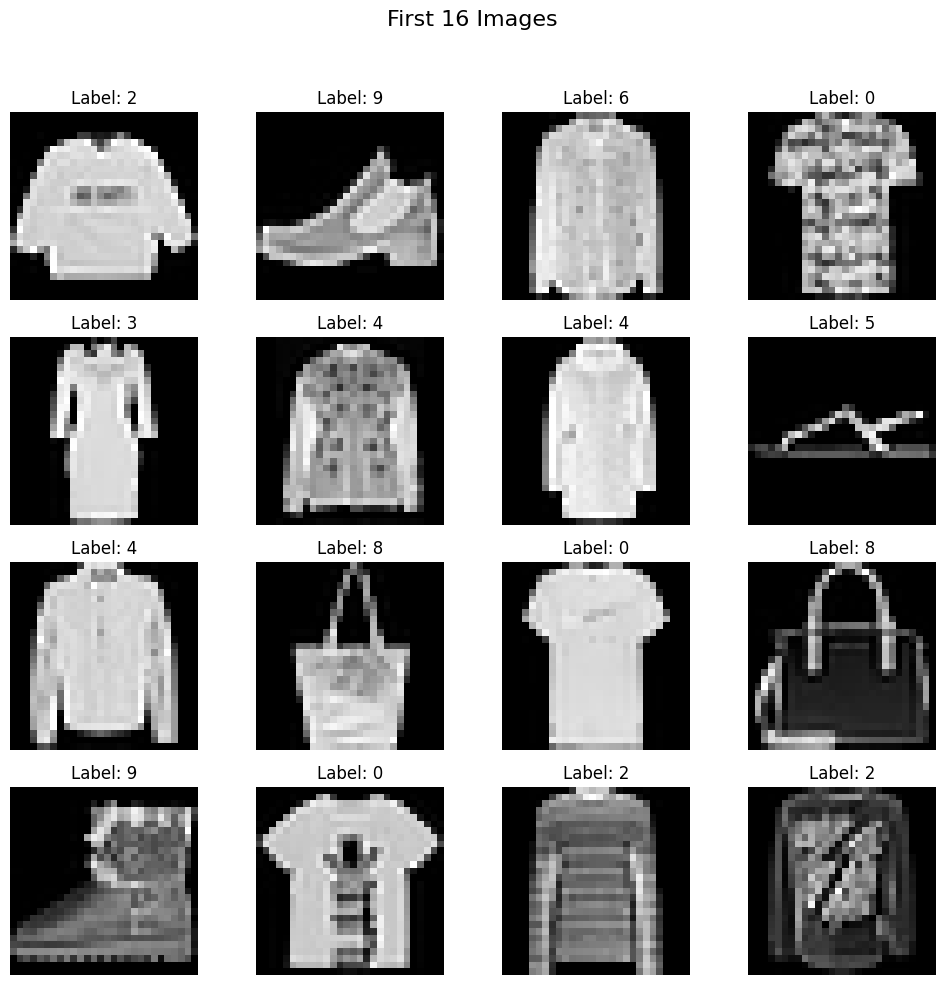

In [112]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle('First 16 Images',fontsize=16)

# //plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img=df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img,cmap='gray')
    ax.axis('off')
    ax.set_title('Label: '+str(df.iloc[i,0]),fontsize=12)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

In [113]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=X_train/255.0
X_test=X_test/255.0


In [114]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
48572,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
38696,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
13611,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
35213,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
31766,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003922,0.0,...,0.000000,0.000000,0.003922,0.000000,0.043137,0.145098,0.023529,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.0,0.0,0.0,0.0,0.011765,0.027451,0.000000,0.000000,0.0,...,0.682353,0.705882,0.768627,0.921569,0.000000,0.000000,1.000000,0.898039,0.65098,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
15795,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007843,0.000000,0.0,...,0.368627,0.290196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0


In [115]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        # Convert Pandas DataFrame/Series to NumPy first, then to Tensor
        if isinstance(features, pd.DataFrame) or isinstance(features, pd.Series):
            features = features.to_numpy(dtype='float32')  # Ensure correct dtype
        if isinstance(labels, pd.Series) or isinstance(labels, pd.DataFrame):
            labels = labels.to_numpy(dtype='int64')  # Ensure labels are integer type

        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [116]:
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)


In [117]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [118]:
class MyNN(nn.Module):

  def __init__(self,input_dim,output_dim,num_hidden_layers,neurons_per_layer,dropout_rate):
    super().__init__()

    layers=[]

    for i in range(num_hidden_layers):
      layers.append(nn.Linear(input_dim,neurons_per_layer))
      layers.append(nn.BatchNorm1d(neurons_per_layer))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      input_dim=neurons_per_layer

    layers.append(nn.Linear(neurons_per_layer,output_dim))

    self.model=nn.Sequential(*layers)

  def forward(self,x):
    return self.model(x)


#Objective function
def objective(trial):

  #next hyperparameter values from the search space 
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 5)
    neurons_per_layer = trial.suggest_int('neurons_per_layer', 8, 128, step=8)
    epochs=trial.suggest_int('epochs', 10, 50, step=10)
    learning_rate=trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    dropout_rate=trial.suggest_float('dropout_rate', 0.1, 0.5, step=0.1)
    batch_size=trial.suggest_categorical('batch_size', [ 16, 32, 64, 128])
    optimizer_name=trial.suggest_categorical('optimizer', ['SGD', 'Adam', 'RMSprop'])
    weight_decay=trial.suggest_float('weight_decay',1e-5,1e-3,log=True)


    train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True,pin_memory=True)
    test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False,pin_memory=True)

  #model INIT
    input_dim=784
    output_dim=10
    model=MyNN(input_dim,output_dim,num_hidden_layers,neurons_per_layer,dropout_rate)
    model.to(device)



  #optimizer Selection
    criterion=nn.CrossEntropyLoss()
    optimizer=optim.SGD(model.parameters(),lr=learning_rate,weight_decay=1e-4)
    if(optimizer_name=='Adam'):
       optim.Adam(model.parameters(),lr=learning_rate,weight_decay=weight_decay)
    elif optimizer_name=='SGD':
       optim.SGD(model.parameters(),lr=learning_rate,weight_decay=weight_decay)
    else:
       optim.RMSprop(model.parameters(),lr=learning_rate,weight_decay=weight_decay)

  #training loop
    for epoch in range(epochs):
      for batch_features, batch_labels in train_loader:

          batch_features=batch_features.to(device)
          batch_labels=batch_labels.to(device)

          # forward pass
          y_pred=model(batch_features)

          #loss calculate
          loss=criterion(y_pred,batch_labels)

          #clear gradients
          optimizer.zero_grad()

          #backward pass
          loss.backward()

          #parameters update
          optimizer.step()


  #evaluation loop
    model.eval()
    total=0
    correct=0

    with torch.no_grad():

      for batch_features, batch_labels in test_loader:
          batch_features=batch_features.to(device)
          batch_labels=batch_labels.to(device)
          outputs=model(batch_features)

          _,predicted=torch.max(outputs,1)

          total+=batch_labels.size(0)
          correct+=(predicted==batch_labels).sum().item()

      accuracy=correct/total
    return accuracy  


In [119]:

import optuna
study=optuna.create_study(direction='maximize')


[I 2025-02-06 23:14:49,946] A new study created in memory with name: no-name-107fc521-5d09-4ef2-8cd5-1a9113be75d0


In [120]:
study.optimize(objective,n_trials=10)

[I 2025-02-06 23:16:59,516] Trial 0 finished with value: 0.8081666666666667 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 120, 'epochs': 40, 'learning_rate': 0.0003527843486482107, 'dropout_rate': 0.2, 'batch_size': 128, 'optimizer': 'RMSprop', 'weight_decay': 0.0002348669219324677}. Best is trial 0 with value: 0.8081666666666667.
[I 2025-02-06 23:21:04,663] Trial 1 finished with value: 0.878 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 104, 'epochs': 40, 'learning_rate': 0.0015978840796345257, 'dropout_rate': 0.4, 'batch_size': 16, 'optimizer': 'RMSprop', 'weight_decay': 0.00025782344277566375}. Best is trial 1 with value: 0.878.
[I 2025-02-06 23:25:35,835] Trial 2 finished with value: 0.88675 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 112, 'epochs': 40, 'learning_rate': 0.001416202491537932, 'dropout_rate': 0.2, 'batch_size': 16, 'optimizer': 'Adam', 'weight_decay': 8.927367529238567e-05}. Best is trial 2 with value: 0.88675.
[I 202

In [121]:
study.best_params

{'num_hidden_layers': 4,
 'neurons_per_layer': 88,
 'epochs': 40,
 'learning_rate': 0.008954047532536997,
 'dropout_rate': 0.2,
 'batch_size': 32,
 'optimizer': 'Adam',
 'weight_decay': 7.088200749461385e-05}

In [123]:
study.best_value    

0.8883333333333333